<a href="https://colab.research.google.com/github/KaykyTajima/Projeto-House-Prices/blob/main/Previs%C3%A3o_de_Pre%C3%A7o_de_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Projeto: Previsão de Preço de Casas

Este projeto de **Aprendizado de Máquina** tem como objetivo desenvolver um modelo capaz de **prever o preço de casas** a partir de características do imóvel. O fluxo do projeto segue boas práticas de ciência de dados e está organizado nas etapas abaixo.

---

## 📦 1. Importação de Bibliotecas Essenciais
Importação das principais bibliotecas para manipulação de dados, visualização, pré-processamento e construção dos modelos de aprendizado de máquina.

---

## 💾 2. Carregamento dos Dados
Leitura da base de dados utilizada no projeto, garantindo que os dados estejam corretamente estruturados para as etapas seguintes.

---

## 🔍 3. Análise Exploratória Inicial dos Dados (EDA)
Análise estatística e visual para compreender o comportamento das variáveis, identificar padrões, correlações e possíveis inconsistências nos dados.

---

## ⚙️ 4. Tratamento da Base de Dados
Limpeza e preparação dos dados, incluindo:
- Tratamento de valores ausentes  
- Codificação de variáveis categóricas  
- Normalização ou padronização de atributos numéricos  

---

## 🏗️ 5. Construção do Pipeline de Pré-processamento
Criação de um pipeline que integra todas as etapas de transformação dos dados, garantindo organização, reprodutibilidade e facilidade de uso.

---

## 🧠 6. Treinamento e Avaliação dos Algoritmos
Treinamento de diferentes algoritmos de regressão e avaliação do desempenho por meio de métricas adequadas, comparando os resultados obtidos.

---

## 🛠️ 7. Otimização de Hiperparâmetros
Ajuste fino dos modelos utilizando técnicas de busca de hiperparâmetros para maximizar a performance preditiva.

---

## 💾 8. Salvar e Carregar o Modelo (Persistência e Nuvem)
Persistência do modelo treinado para reutilização futura, permitindo carregamento local ou em ambientes de nuvem.

---

## 📝 9. Submissão da Base de Teste
Aplicação do modelo final em dados inéditos para gerar as previsões finais de preços dos imóveis.

---

📌 **Resultado Esperado:**  
Um modelo robusto e confiável para previsão de preços de casas, aplicando conceitos práticos de ciência de dados e aprendizado de máquina em um problema real.


## 📦 Importação de Bibliotecas Essenciais

> 🎯 **Objetivo:** Nesta seção, carregamos todos os pacotes necessários para manipulação de dados, visualização e modelagem no nosso projeto. Manteremos esta lista organizada para facilitar a manutenção.

---

In [1]:
# Análise de dados
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# Pré Processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Avaliação e selecão de hiperparâmetros do modelo
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

## 💾 Carregamento dos Dados

> 📍 **Localização:** Esta etapa foca na localização e leitura dos arquivos de dados brutos, transformando-os em DataFrames manipuláveis.

---

In [2]:
#!pip install kaggle --upgrade -q

# Baixar o token de autenticação no kaggle
# Importar o arquivo 'kaggle.json'
upload = files.upload()

# Guardar p arquivo
uploaded_filename = list(upload.keys())[0]

# Local de armazenamento e renomeação para 'kaggle.json'
!mkdir -p ~/.kaggle
!mv "{uploaded_filename}" ~/.kaggle/kaggle.json

# Modifica as permissões do arquivo
!chmod 600 ~/.kaggle/kaggle.json

# Baixa o dataset - vem em formato .zip
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Descompacta o arquivo
!unzip \*.zip  && rm *.zip

Saving kaggle (2).json to kaggle (2).json
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 539MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# Carregar e visulaizar
df_treino = pd.read_csv('train.csv')
df_treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🔍 Análise Exploratória dos Dados

> 🗺️ **Primeira Vista:**  
> Nesta etapa, realiza-se uma análise inicial do conjunto de dados com o objetivo de compreender sua estrutura geral, verificar a integridade das informações e identificar possíveis problemas como valores ausentes, inconsistências ou tipos de dados inadequados. Além disso, é explorado o comportamento da variável alvo, analisando sua distribuição, presença de outliers e características estatísticas fundamentais para o processo de modelagem. Por fim, avaliam-se as relações entre as variáveis por meio da matriz de correlação, permitindo identificar padrões de dependência, influência entre atributos e possíveis casos de multicolinearidade, fornecendo subsídios importantes para o tratamento dos dados e a construção do pipeline de machine learning.


In [4]:
# visualizar os atributos
print(f'{df_treino.shape[0]} linhas e colunas {df_treino.shape[1]}')

1460 linhas e colunas 81


In [5]:
# Visualizar principais informações
print(df_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Verificar os atributos com valores nulos
df_treino.isnull().sum().loc[lambda x: x>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [7]:
# Análise incicial de variáveis numericas
df_treino.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Análise incicial de variáveis categóricas
df_treino.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [86]:
# Verificar se existem valores duplicados
existe_duplicata = df_treino.duplicated().any()

if not existe_duplicata:
  print('Não existem valores duplicados')
else:
  print('Existem valores duplicados')

Não existem valores duplicados


In [10]:
# Criar cópia
df = df_treino.copy()

In [11]:
# Separar listas de variáveis númericas e categóricas
var_num = df.select_dtypes(include=['int64', 'float64']).columns
var_cat = df.select_dtypes(include=['object']).columns

In [12]:
# Separar em duas bases
df_num = df[var_num]
df_cat = df[var_cat]

In [13]:
# Criar cópias das bases
df_num_copy = df_num.copy()
df_cat_copy = df_cat.copy()

### 🎯 Explorando a Variável Alvo (Target Variable)
> 💡 **Insights:** Focar na variável que queremos prever (y) é essencial. Esta análise nos ajuda a entender sua distribuição, proporção e se há necessidade de técnicas de balanceamento antes da modelagem.
---

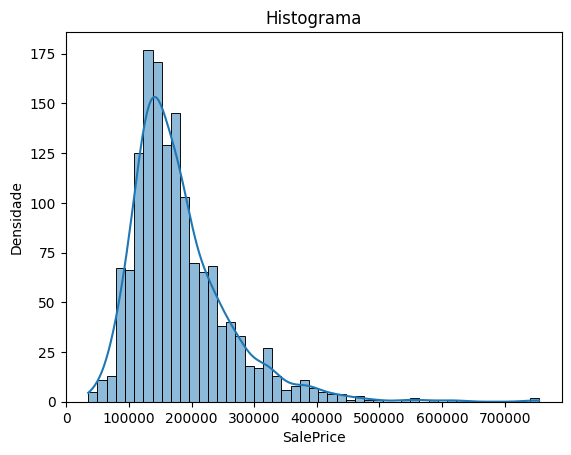

In [14]:
# Visualizando
sns.histplot(data = df, x = 'SalePrice', kde=True)
plt.title('Histograma')
plt.xlabel(f'SalePrice')
plt.ylabel('Densidade')
plt.show()

*> Percebemos que a variável possui comportamento próximo de uma distribuição normal com uma cauda distorcida*

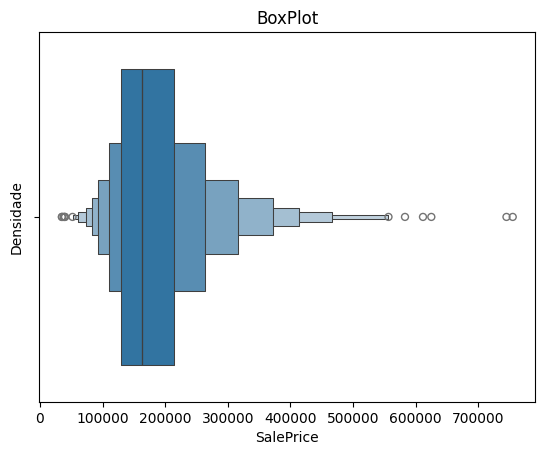

In [15]:
# Visualizamos os Outliers
sns.boxenplot(data = df, x = 'SalePrice')
plt.title('BoxPlot')
plt.xlabel(f'SalePrice')
plt.ylabel('Densidade')
plt.show()

>*Observa-se que a variável SalePrice possui outliers concentrados em valores acima de 50.000 e abaixo de 10.000. Para tratarmos esses pontos, vamos utilizar os limites inferiores e superiores do boxplot e substituir os outliers por esses respecivos valores.*

In [16]:
# Função de remover outliers baseado no Boxplot e suas respectivas estatísticas
def remover_ouliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_sem_outliers

In [17]:
#  Aplicar Função
df_treino = remover_ouliers(df_treino, 'SalePrice')

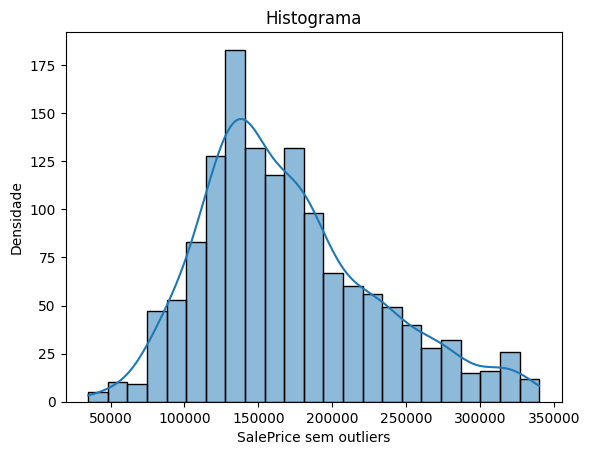

In [18]:
# Visualizando novamente
sns.histplot(data = df_treino, x = 'SalePrice', kde=True)
plt.title('Histograma')
plt.xlabel(f'SalePrice sem outliers')
plt.ylabel('Densidade')
plt.show()

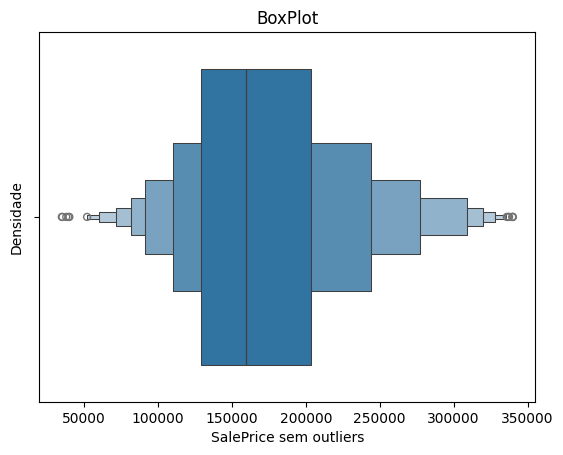

In [19]:
# Visualizamos sem os Outliers
sns.boxenplot(data = df_treino, x = 'SalePrice')
plt.title('BoxPlot')
plt.xlabel(f'SalePrice sem outliers')
plt.ylabel('Densidade')
plt.show()

### 📈 Buscando Correlações (Alvo vs. Variáveis Numéricas)
>🔗 **Relacionamento:** Esta análise mede a força e a direção da relação linear entre a variável alvo (y) e cada uma das variáveis numéricas (X). Um alto coeficiente de correlação (próximo de +1 ou -1) sugere um forte poder preditivo.
---

In [20]:
# Avaliação de correlação das variáveis númericas em geral
matrix_corr = df_num.corr()
matrix_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [21]:
# Avaliar as variáveis mais linearmente correlacionadas com o alvo
matrix_corr['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


>*A análise da matriz de correlação indica que as variáveis:* **OverallQual**, **GrLivArea**, **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF**, *apresentam os maiores coeficientes de correlação linear com a variável* **SalePrice**. *Esse resultado sugere que características relacionadas à qualidade geral do imóvel, área construída, capacidade e tamanho da garagem, área do porão, distribuição dos ambientes e ano de construção ou reforma exercem influência significativa no valor de venda. Essas variáveis mostram-se, portanto, altamente relevantes para o processo de modelagem preditiva, servindo como importantes preditores na estimativa do preço dos imóveis.*


## ⚙️ Tratamento da Base de Dados

> 🧹 **Foco:** Nesta fase, transformamos os dados brutos em um formato adequado para a modelagem. O tratamento inclui a limpeza de valores ausentes, a correção de tipos de dados e a codificação de variáveis categóricas.

---

In [22]:
# Remover o alvo da cópia
df_num_copy = df_num_copy.drop(columns=['SalePrice'],axis=1)
var_num_copy = df_num_copy.columns

### 🏷️ Tratamento de Variáveis Categóricas
>🔄 **Necessidade:** Modelos de Machine Learning trabalham primariamente com números. Nesta etapa, transformamos rótulos de texto (variáveis categóricas) em representações numéricas que os algoritmos podem processar, excluimos atributos com muitos valores nulos e substituimos outros valores nulos de acordo com alguma estratégia.

---

In [23]:
# Visualizar
df_cat_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [24]:
# Excluir algumas variáveis com muitos valores nulos
df_cat_copy = df_cat_copy.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [25]:
# Analisar os valores mais frequentes de cada uma dessas tabelas
var_analise = [
     'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
]

df_cat_copy[var_analise].describe(include = 'object')

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
count,588,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379
unique,3,4,4,4,6,6,5,5,6,3,5,5
top,BrkFace,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA
freq,445,649,1311,953,430,1256,1334,380,870,605,1311,1326


In [26]:
# Substituir os valores nulos pelos mais frequentes
impute = SimpleImputer(strategy = 'most_frequent')
df_cat_transformado = impute.fit_transform(df_cat_copy[var_analise])

Atributo: MSZoning


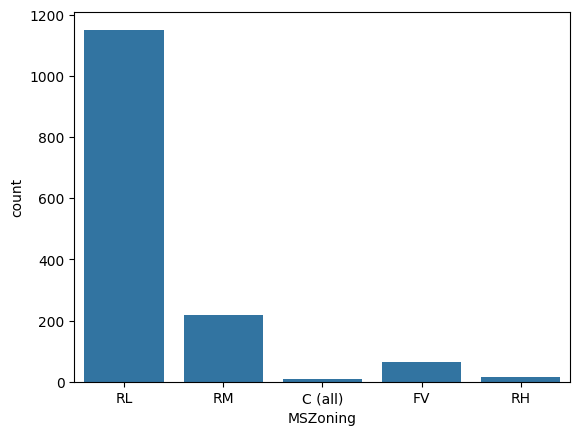

Atributo: Street


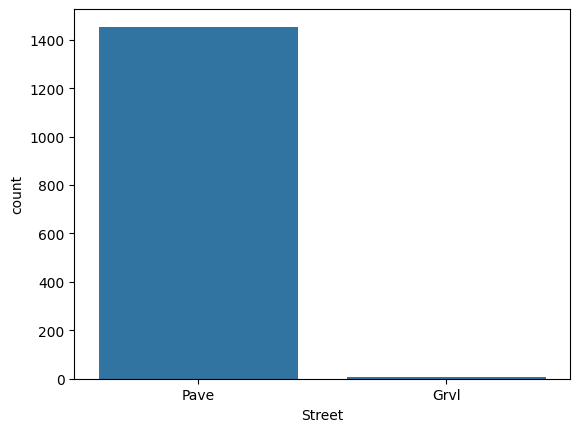

Atributo: Alley


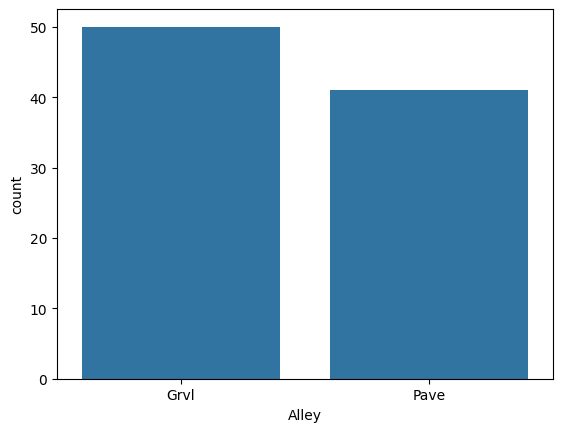

Atributo: LotShape


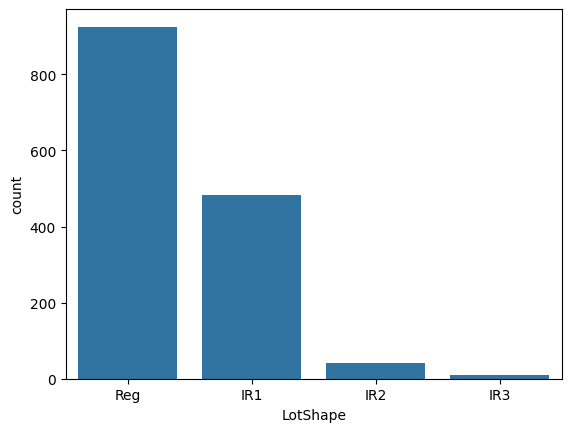

Atributo: LandContour


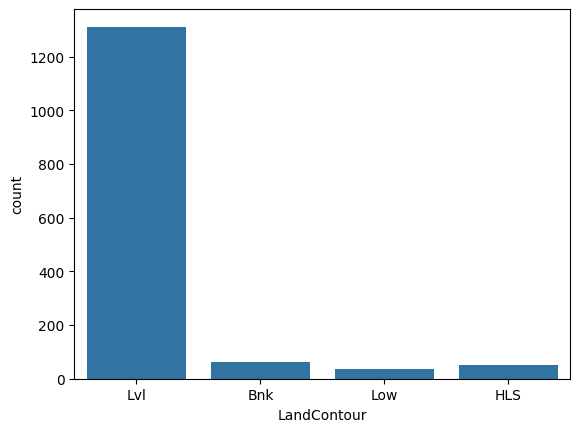

Atributo: Utilities


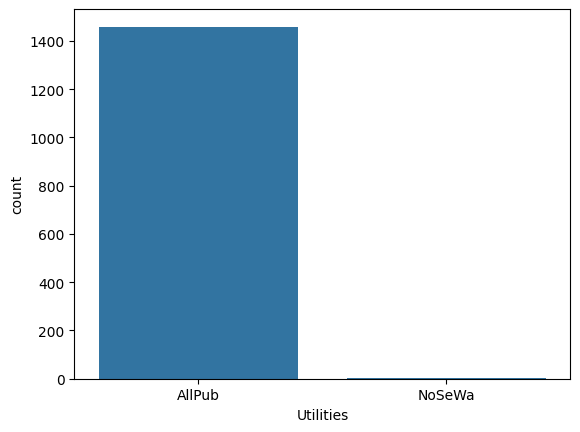

Atributo: LotConfig


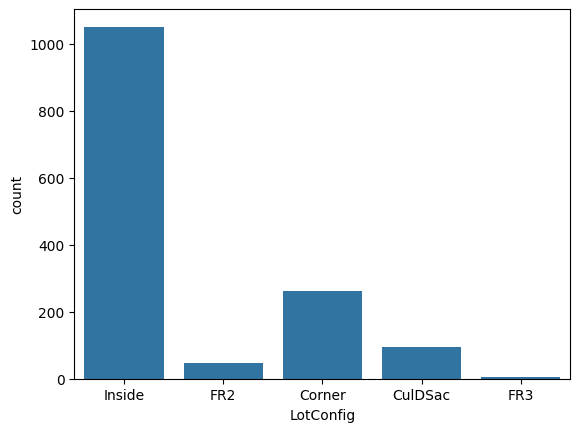

Atributo: LandSlope


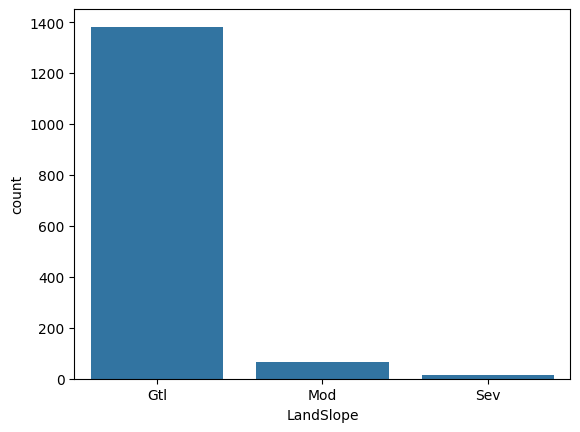

Atributo: Neighborhood


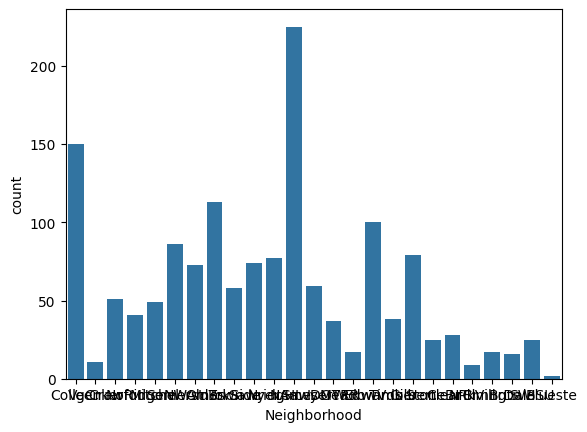

Atributo: Condition1


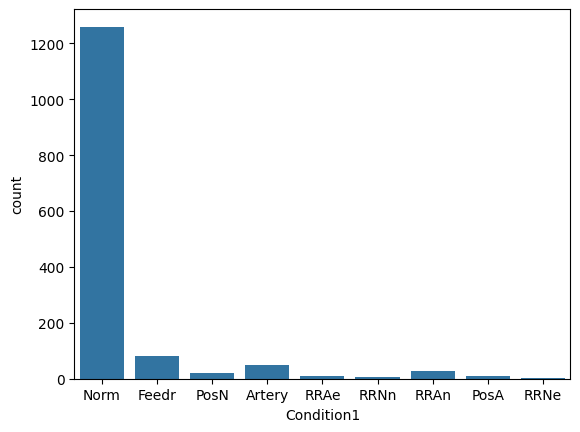

Atributo: Condition2


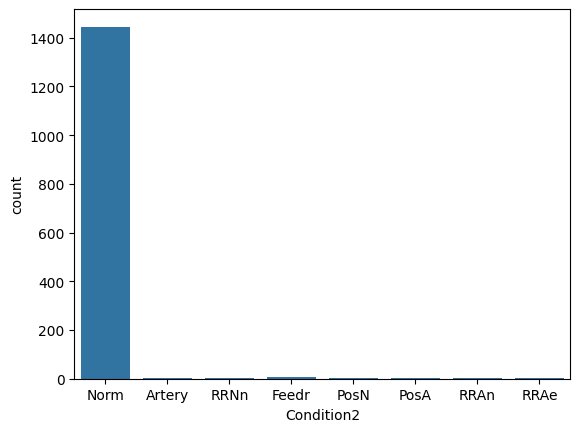

Atributo: BldgType


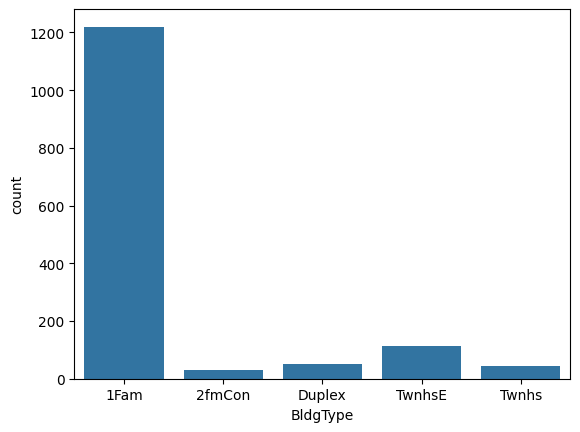

Atributo: HouseStyle


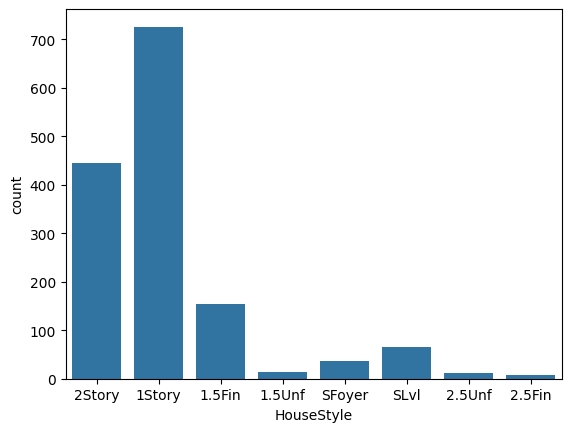

Atributo: RoofStyle


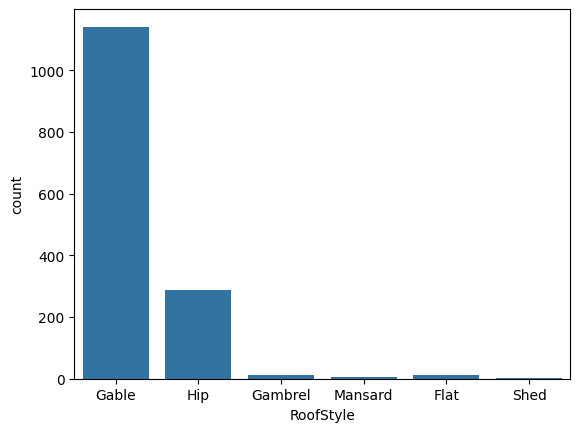

Atributo: RoofMatl


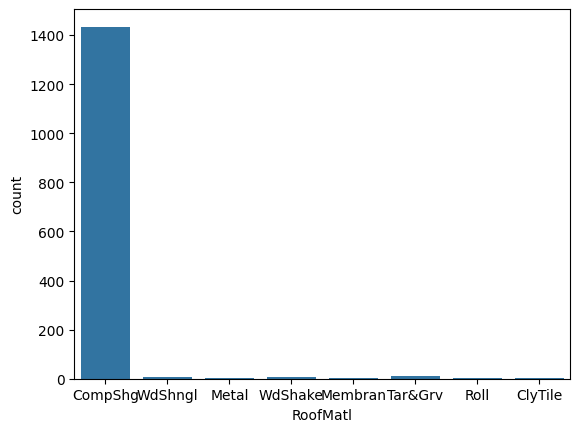

Atributo: Exterior1st


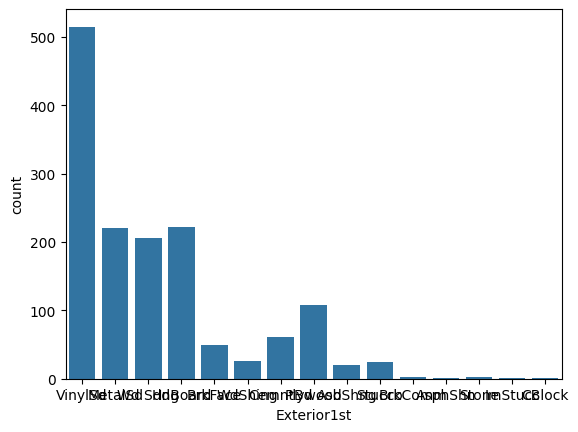

Atributo: Exterior2nd


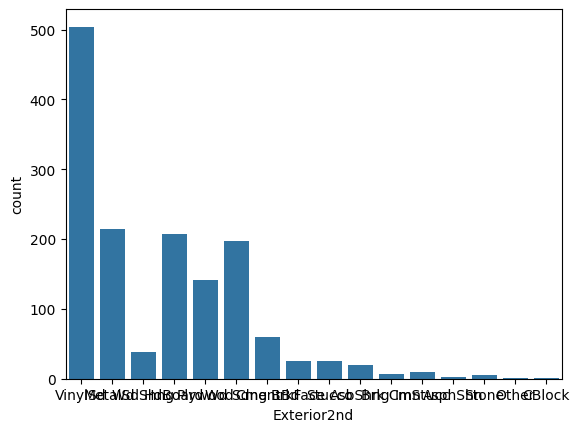

Atributo: MasVnrType


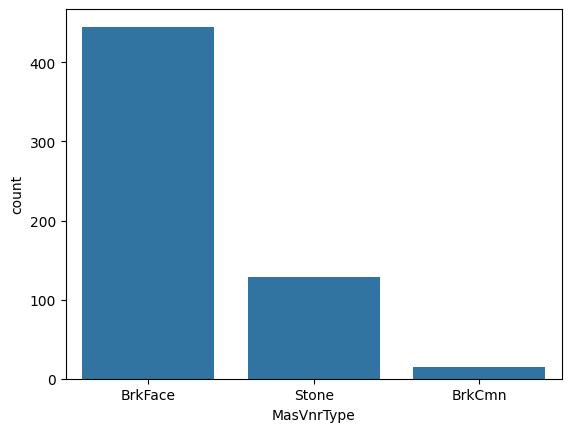

Atributo: ExterQual


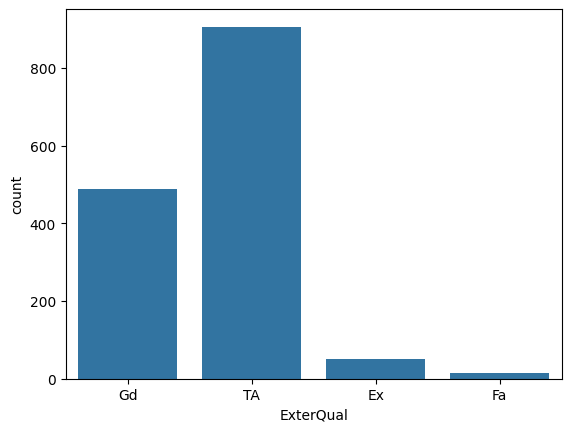

Atributo: ExterCond


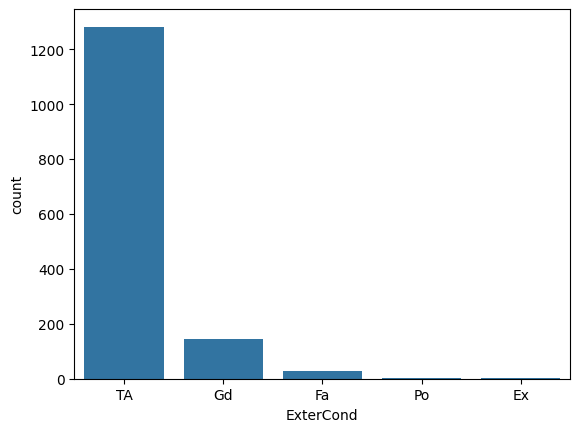

Atributo: Foundation


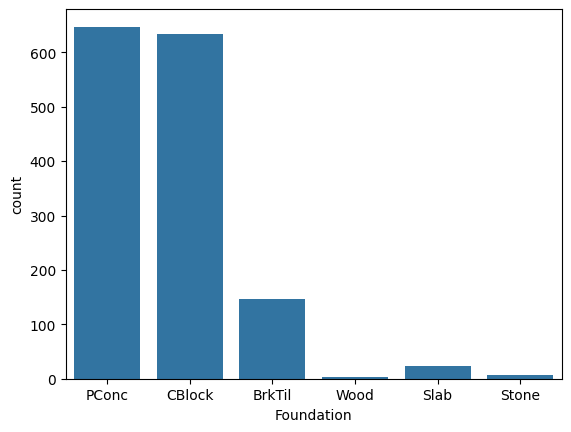

Atributo: BsmtQual


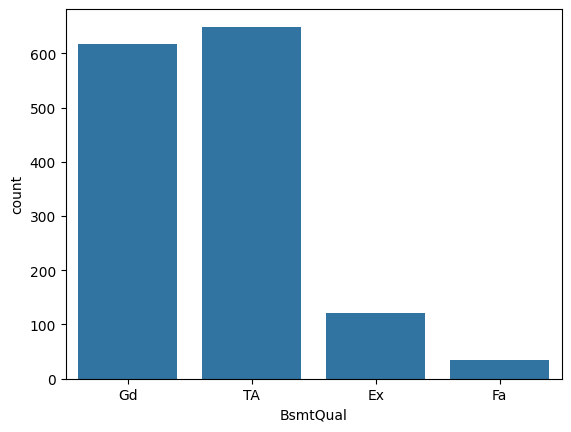

Atributo: BsmtCond


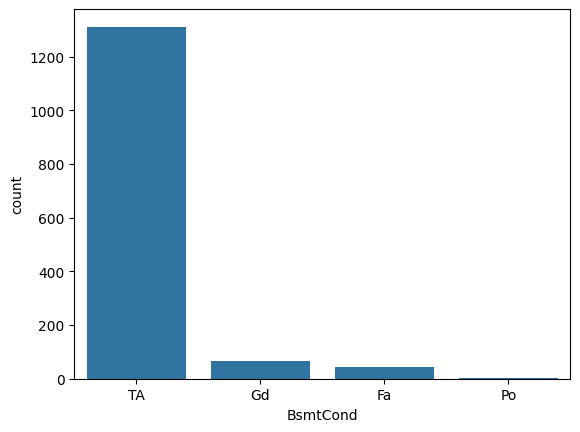

Atributo: BsmtExposure


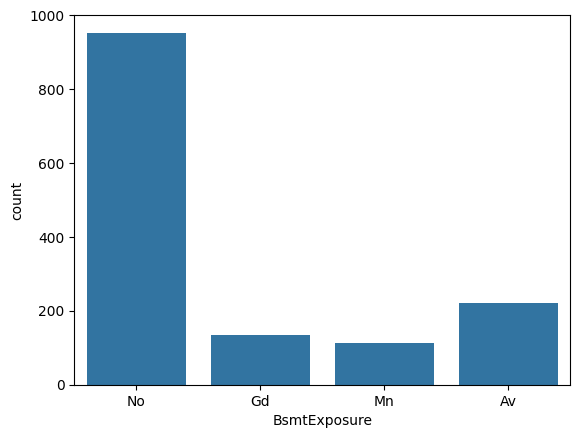

Atributo: BsmtFinType1


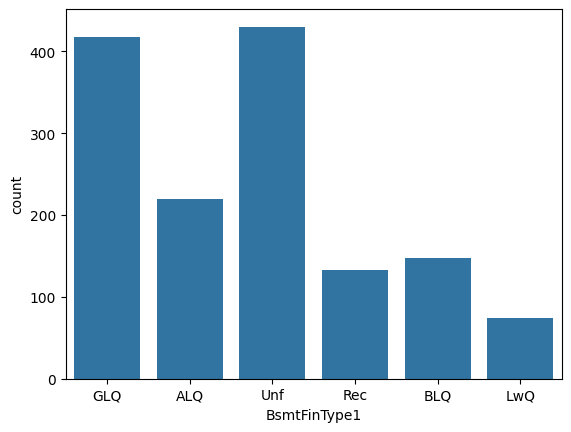

Atributo: BsmtFinType2


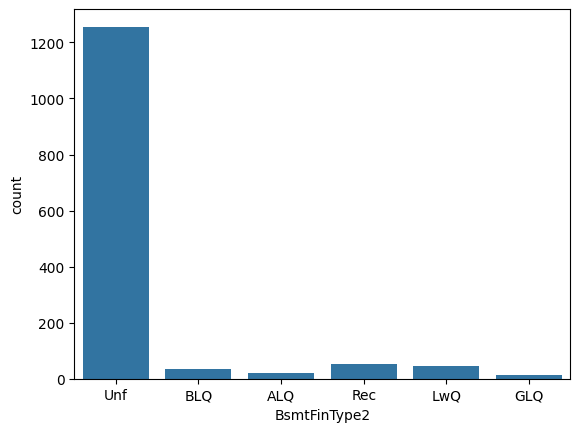

Atributo: Heating


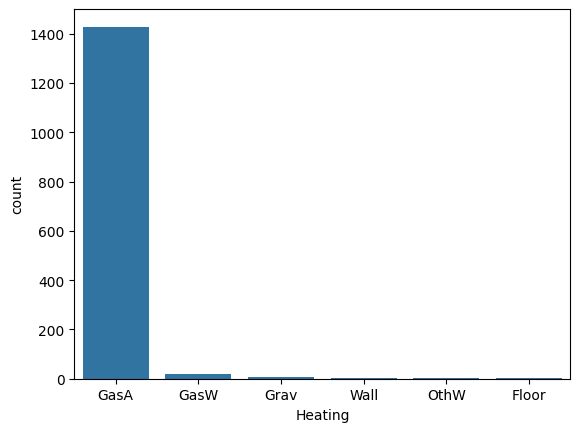

Atributo: HeatingQC


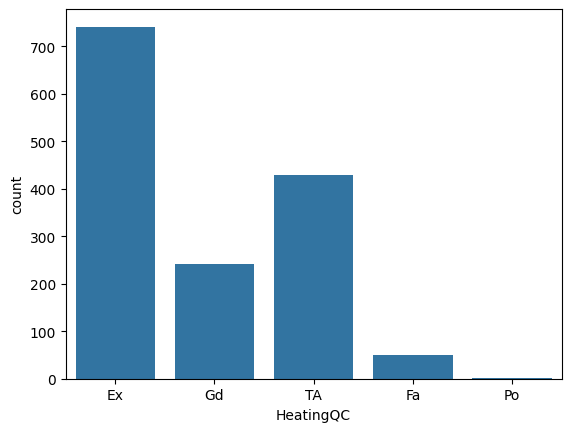

Atributo: CentralAir


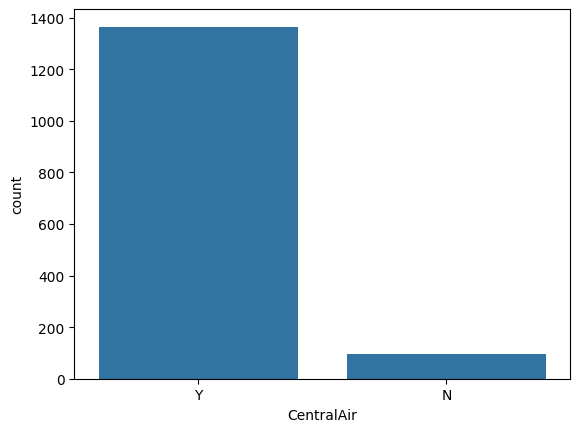

Atributo: Electrical


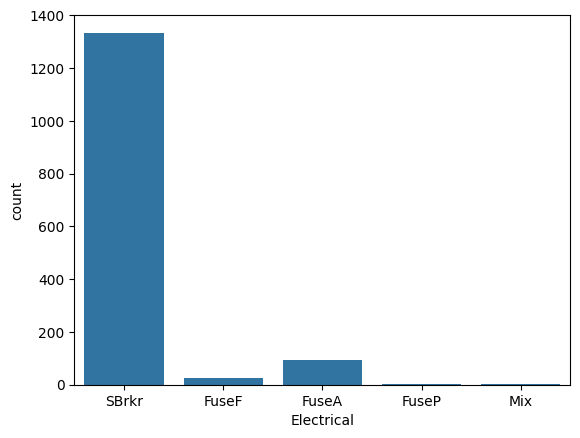

Atributo: KitchenQual


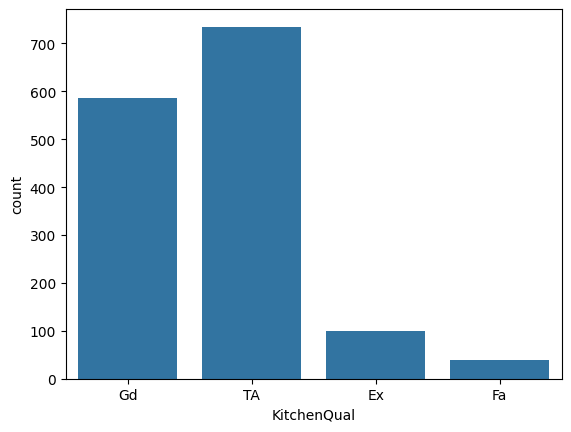

Atributo: Functional


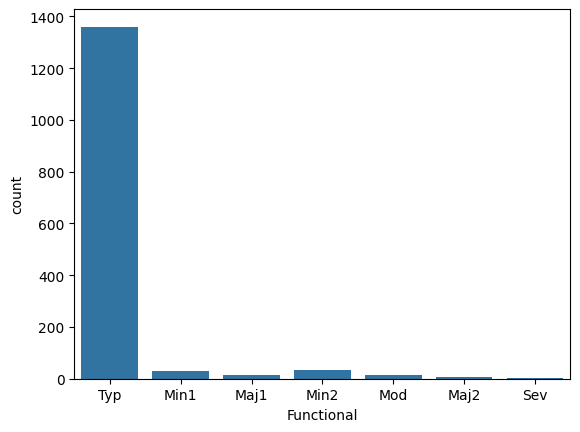

Atributo: FireplaceQu


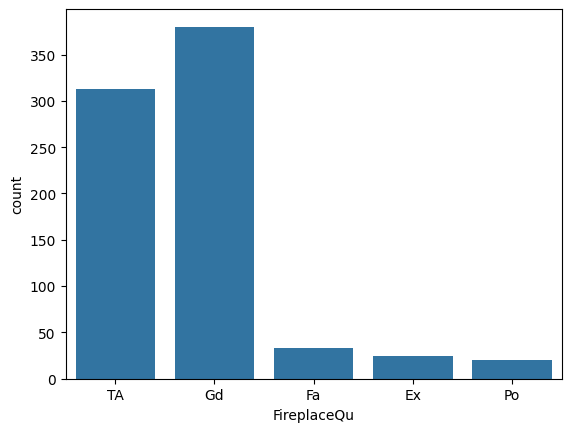

Atributo: GarageType


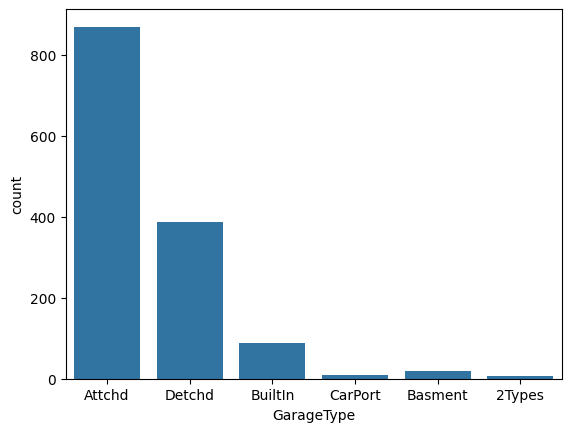

Atributo: GarageFinish


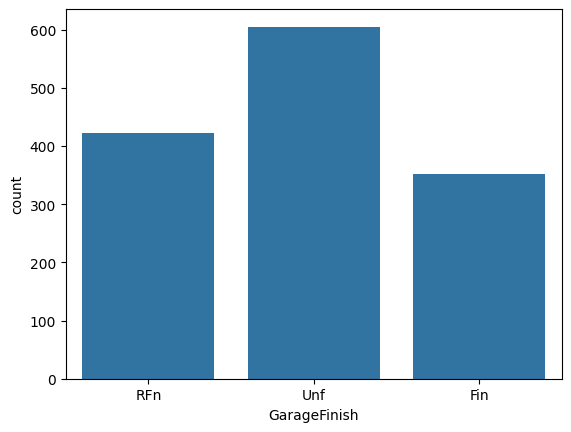

Atributo: GarageQual


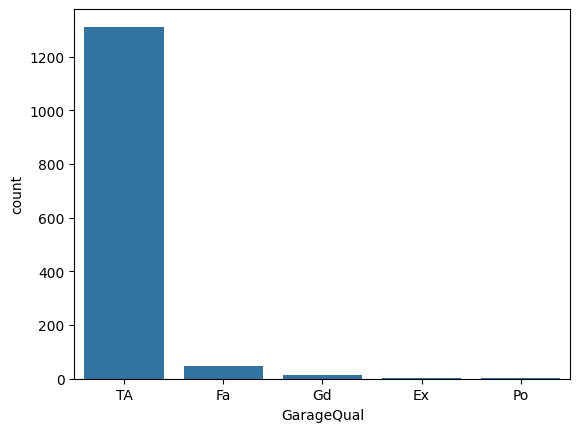

Atributo: GarageCond


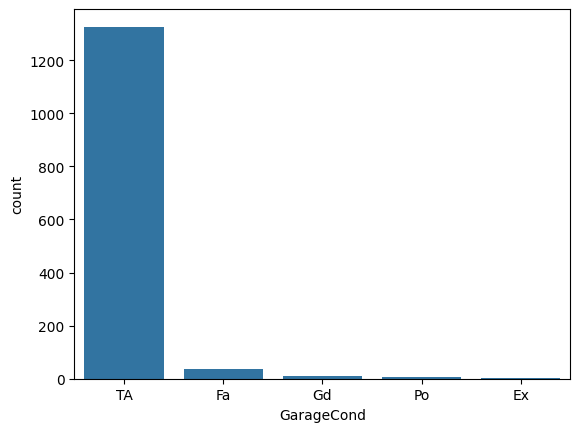

Atributo: PavedDrive


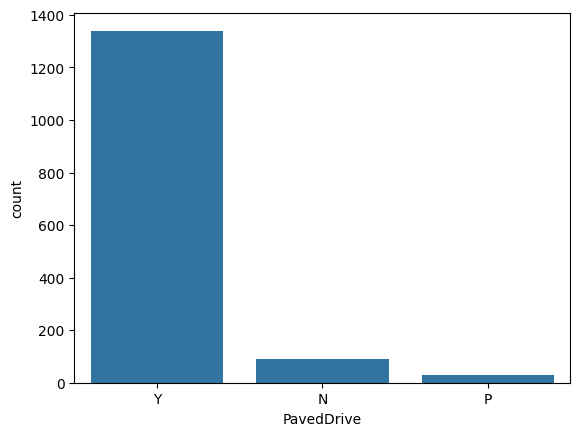

Atributo: PoolQC


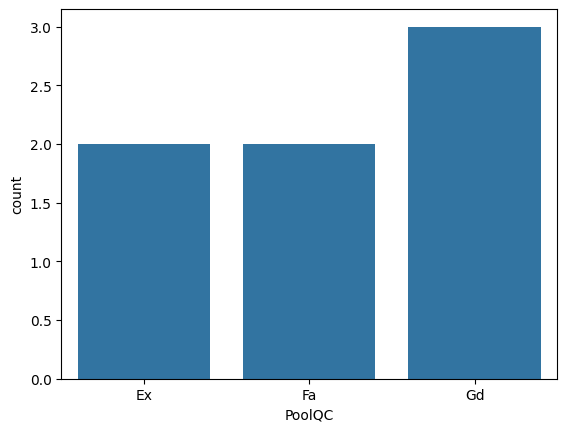

Atributo: Fence


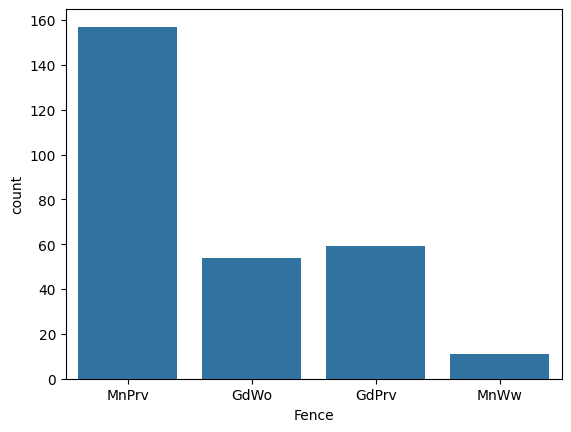

Atributo: MiscFeature


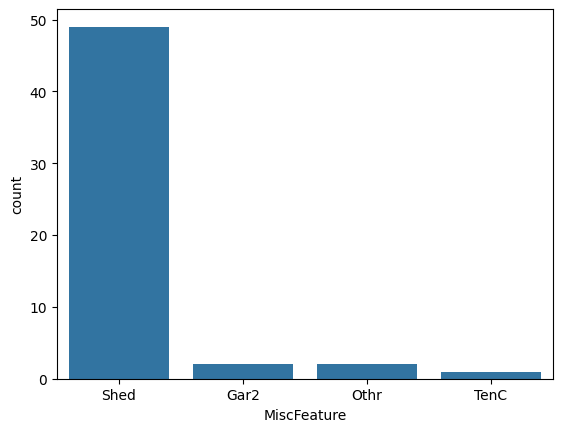

Atributo: SaleType


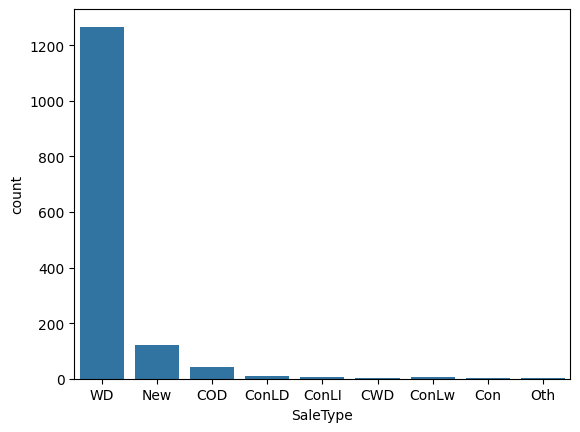

Atributo: SaleCondition


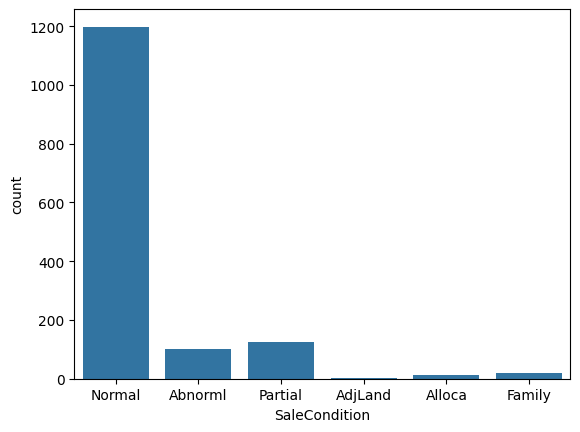

In [27]:
# Analisar variáveis
for atributo in df_cat.columns:
  print(f'Atributo: {atributo}')
  sns.countplot(data = df_cat, x = atributo)
  plt.show()

In [28]:
# Visualizar novamente
df_cat_transformado = pd.DataFrame(df_cat_transformado, columns=var_analise)
df_cat_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1460 non-null   object
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   Electrical    1460 non-null   object
 7   FireplaceQu   1460 non-null   object
 8   GarageType    1460 non-null   object
 9   GarageFinish  1460 non-null   object
 10  GarageQual    1460 non-null   object
 11  GarageCond    1460 non-null   object
dtypes: object(12)
memory usage: 137.0+ KB


In [29]:
# Variáveis Ordinais (Para Ordinal Encoding)
# Estas possuem uma hierarquia de qualidade
cols_ordinais = [
    'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive'
]

# Variáveis Nominais (Para OneHot Encoding)
# Estas representam categorias sem ordem matemática
cols_nominais = [
    'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType',
    'SaleCondition'
]

In [30]:
# Transformação dos atributos categóricos da base
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

df_cat_one_hot = one_hot_encoder.fit_transform(df_cat_copy[cols_nominais])
df_cat_ordinal = ordinal_encoder.fit_transform(df_cat_copy[cols_ordinais])

In [31]:
# Visualizar
df_cat_one_hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30660 stored elements and shape (1460, 158)>

In [32]:
# Visualizar
df_cat_ordinal

array([[3., 0., 2., ..., 4., 4., 2.],
       [3., 0., 3., ..., 4., 4., 2.],
       [0., 0., 2., ..., 4., 4., 2.],
       ...,
       [3., 0., 0., ..., 4., 4., 2.],
       [3., 0., 3., ..., 4., 4., 2.],
       [3., 0., 2., ..., 4., 4., 2.]])

### 📏 Tratamento de Variáveis Numéricas
> 🛠️ **Foco:**  Nesta etapa crucial, abordamos dois problemas principais: a diferença de escala entre as variáveis (Padronização) e a presença de valores nulos (Imputação), garantindo dados limpos e uniformes para a modelagem.

---

In [33]:
# Visualizar
df_num_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [92]:
len(df_num_copy['YrSold'].unique())

5

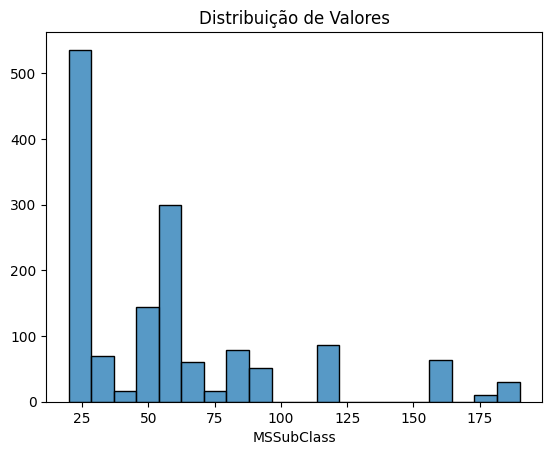

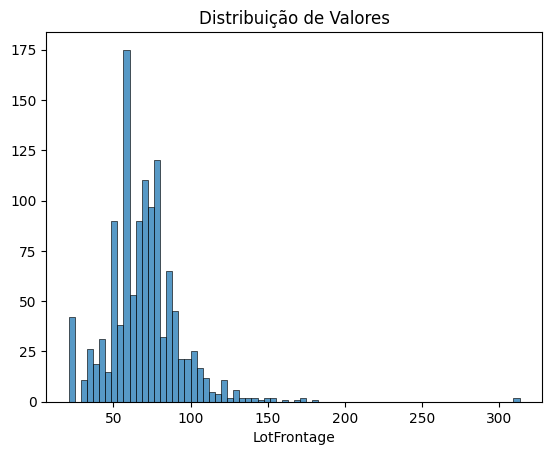

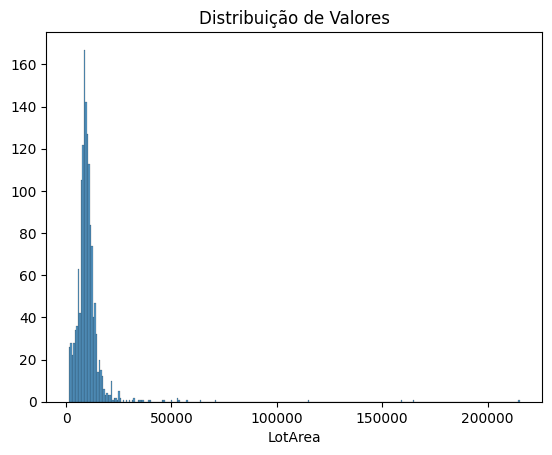

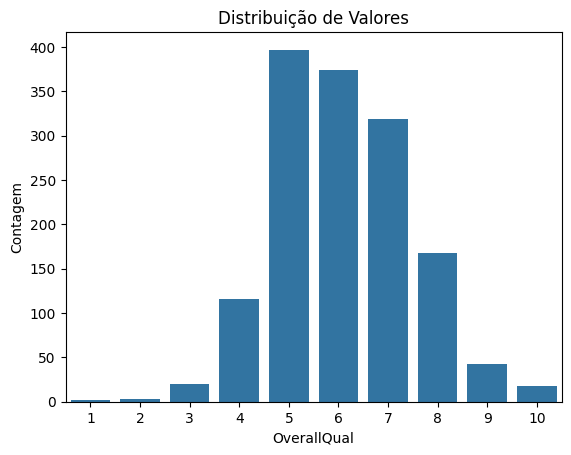

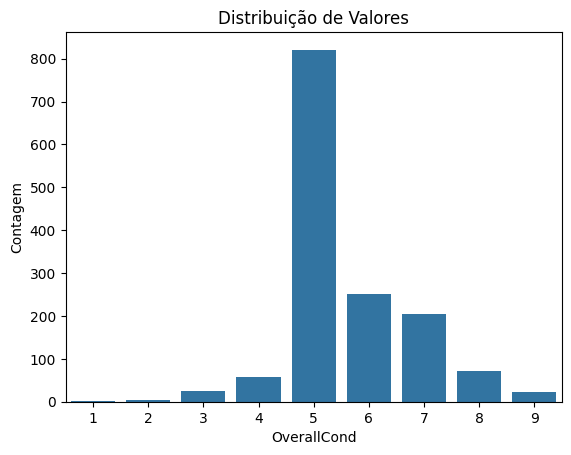

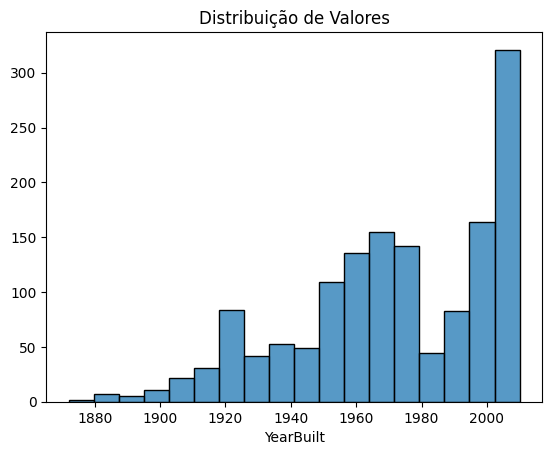

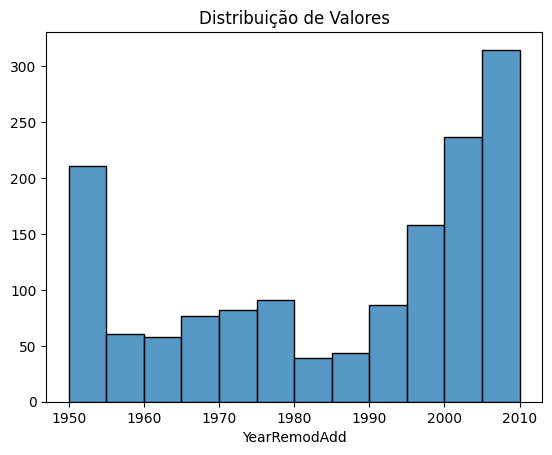

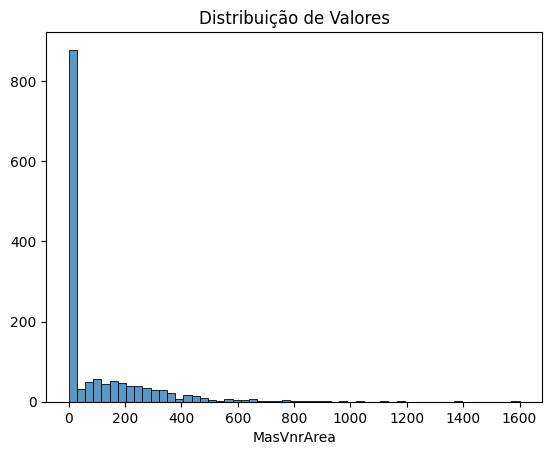

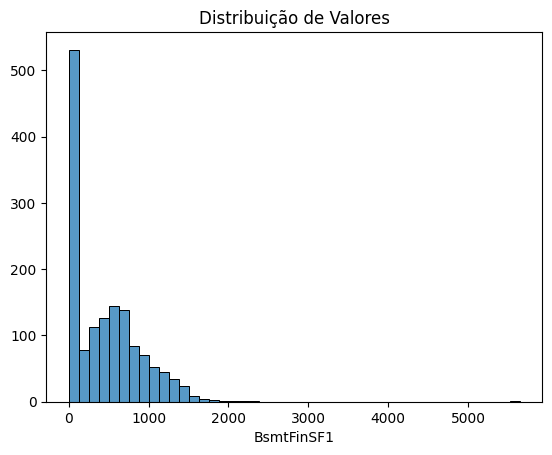

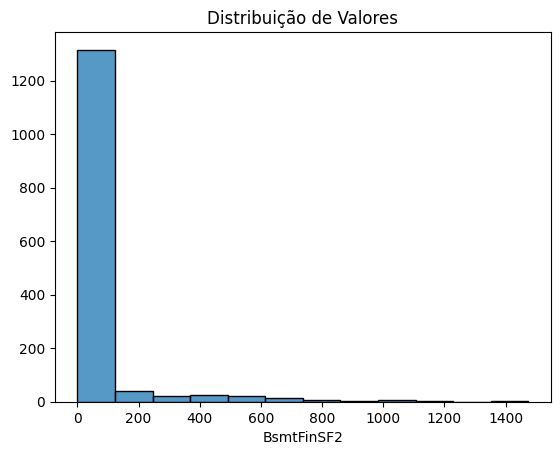

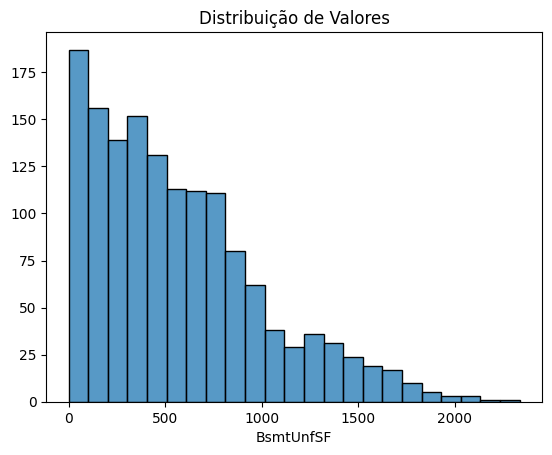

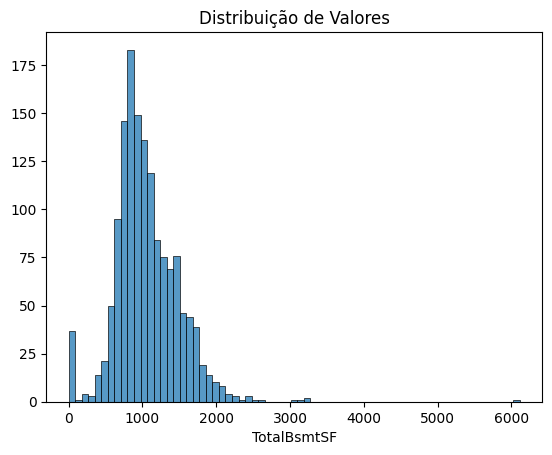

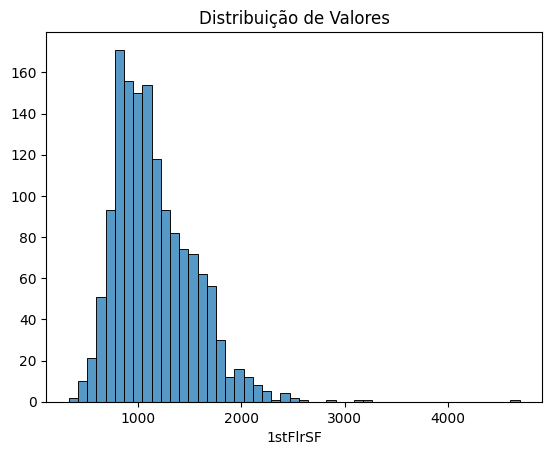

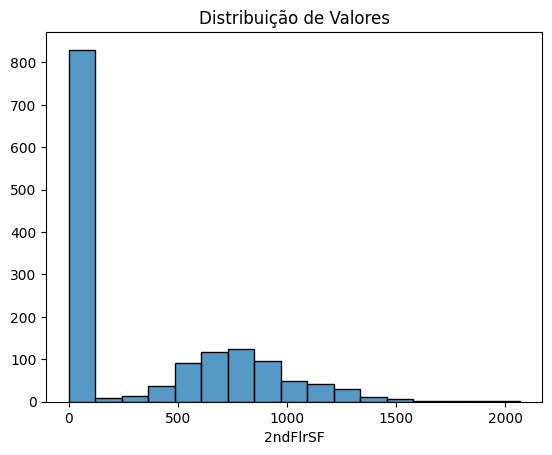

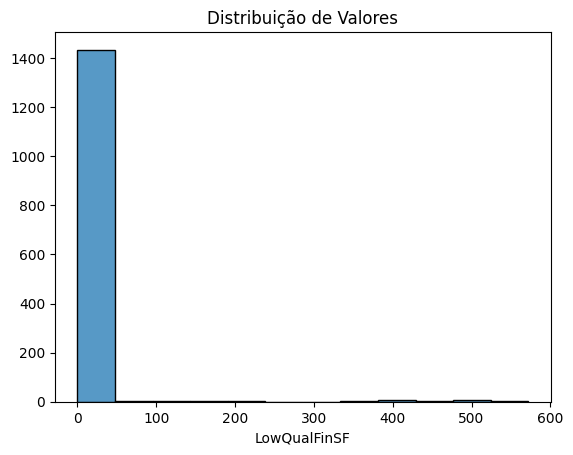

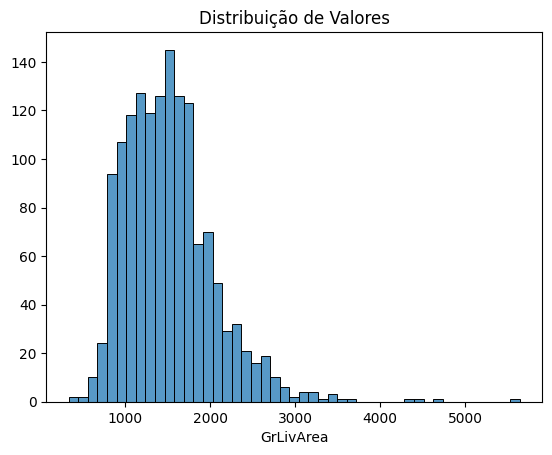

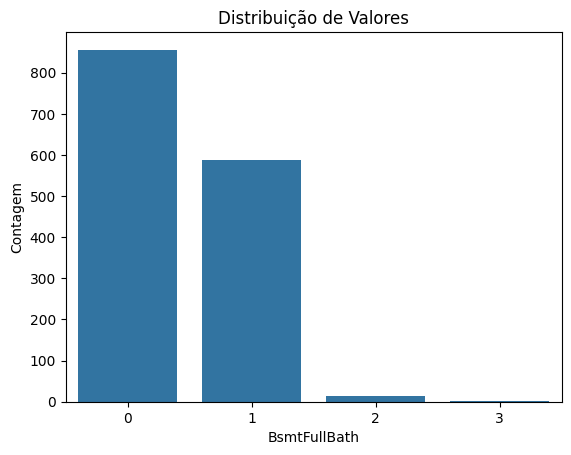

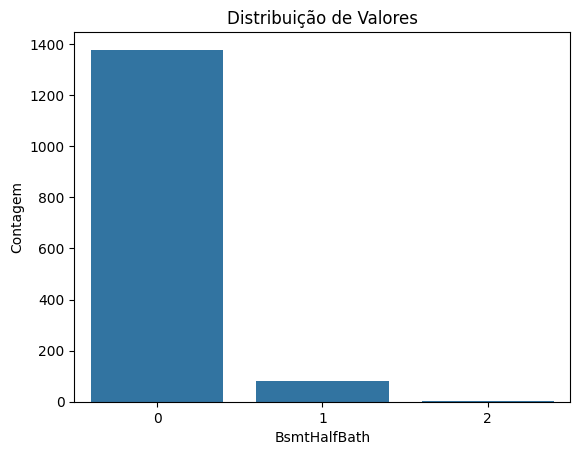

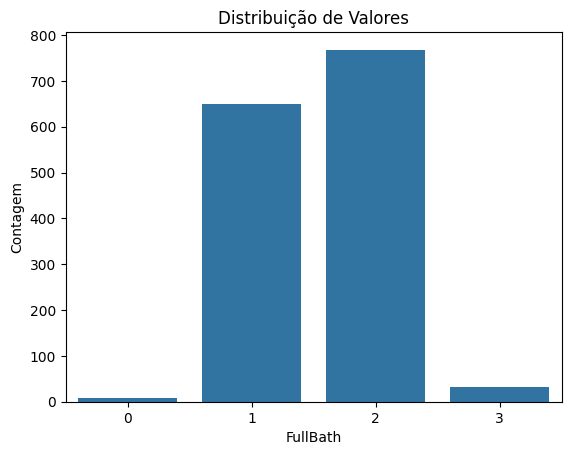

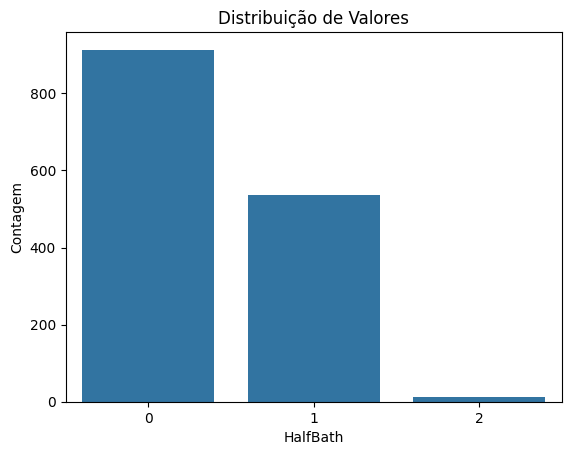

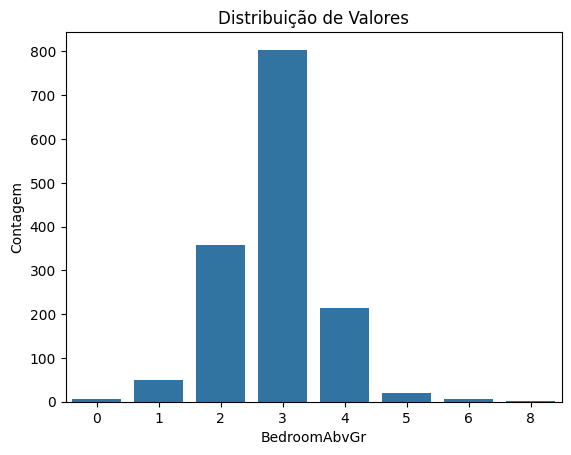

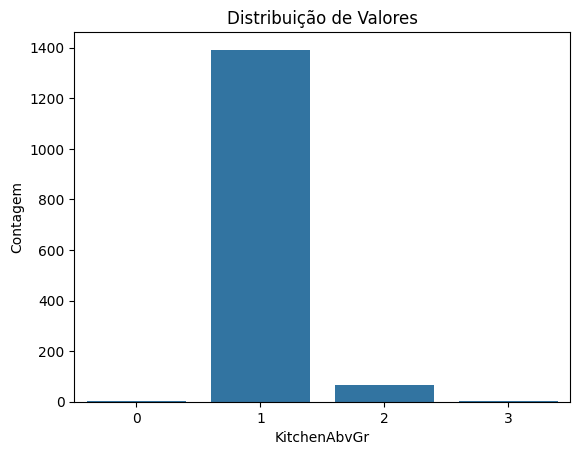

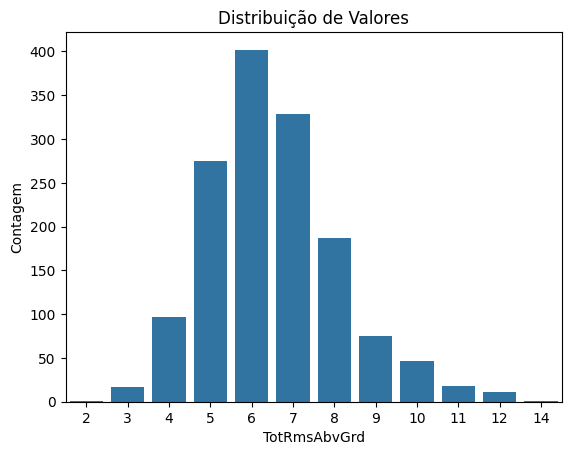

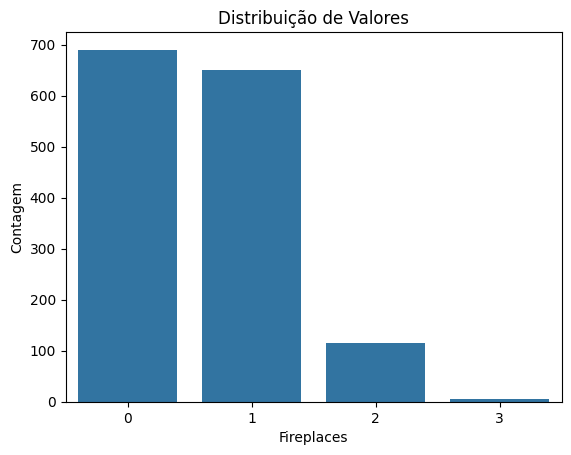

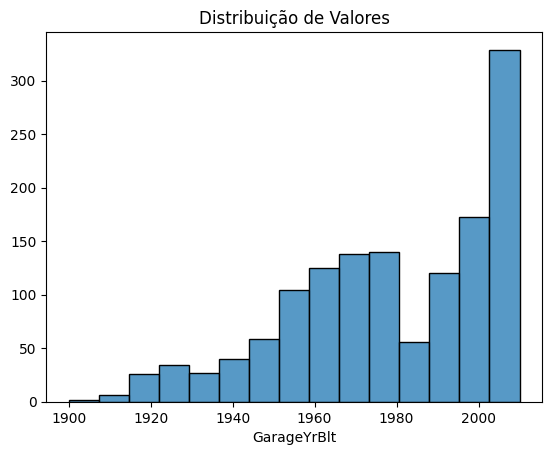

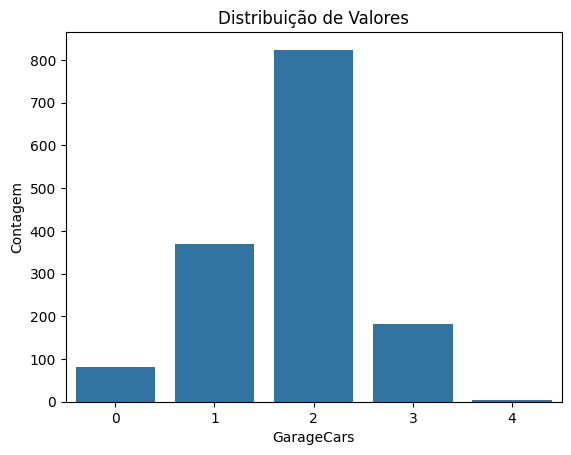

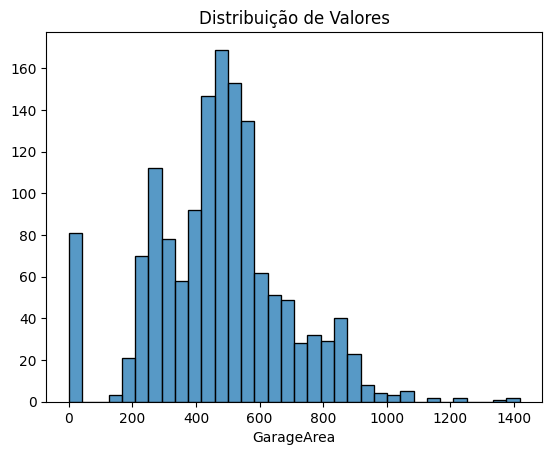

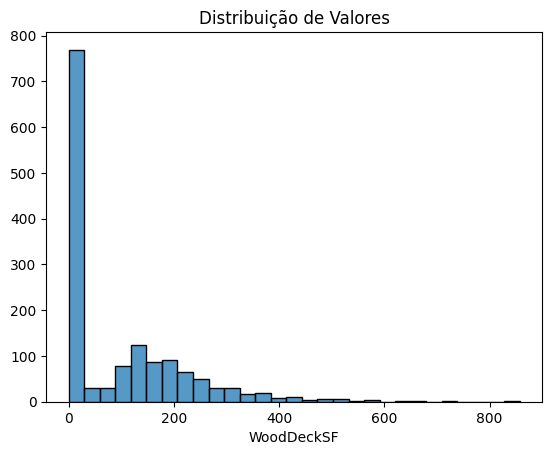

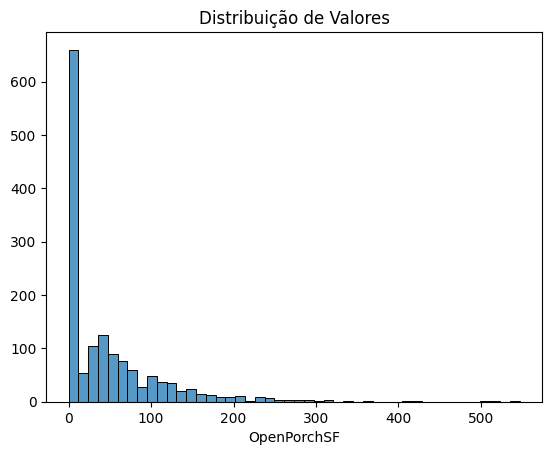

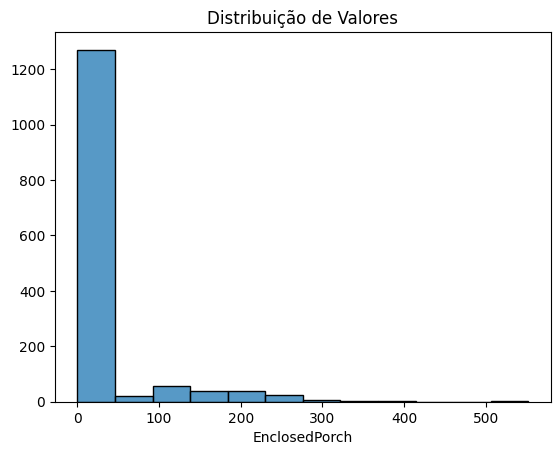

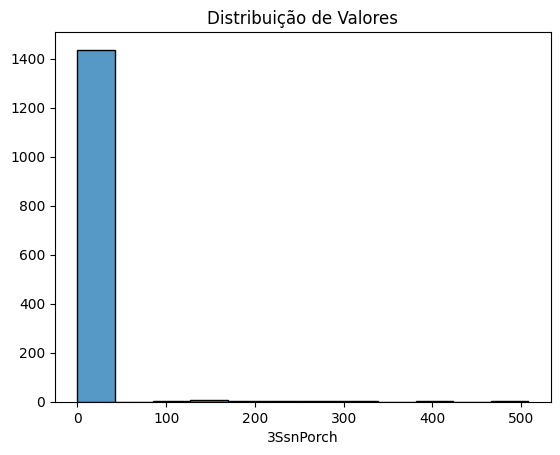

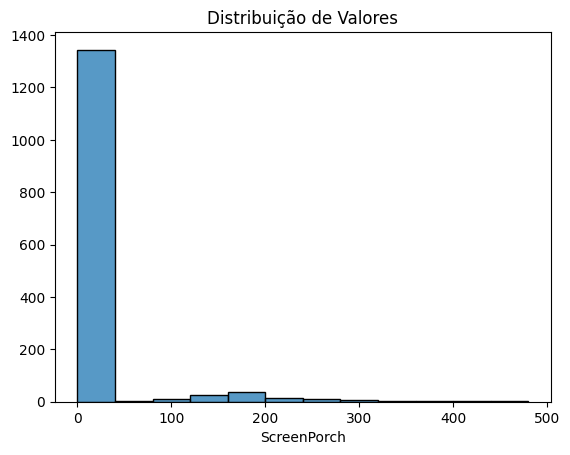

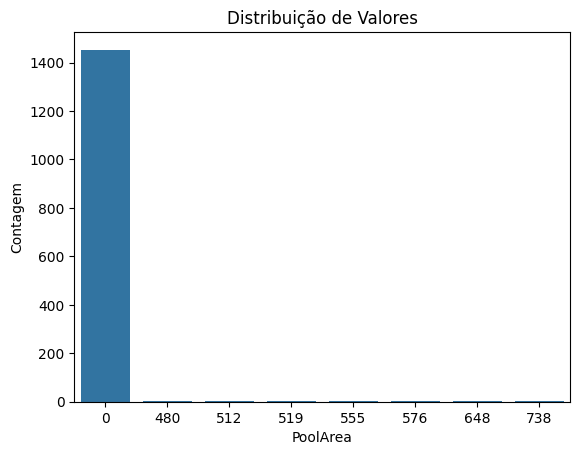

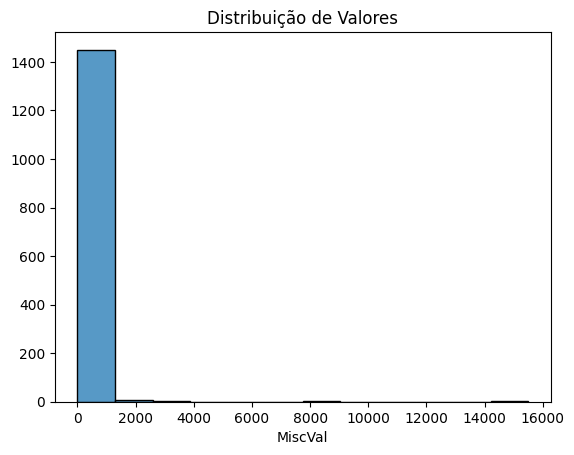

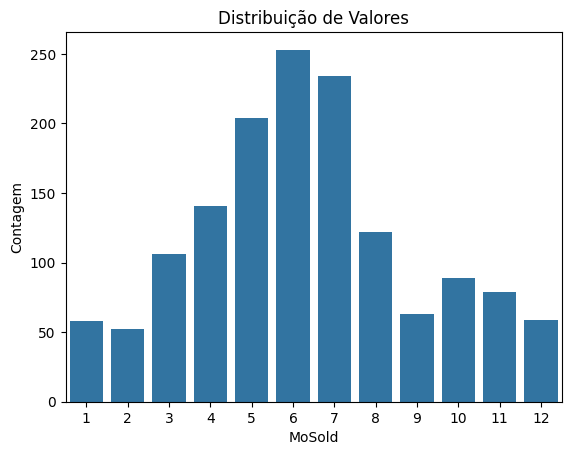

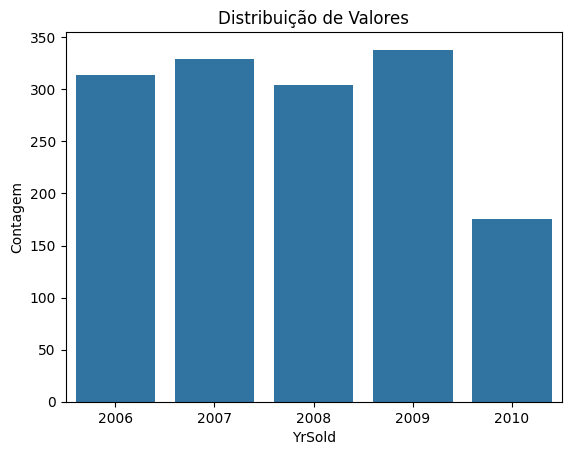

In [101]:
# Plotar gráficos de distribuição e gráficos de barra
for atributo in df_num_copy.columns:
  ylabel=''
  if df_num_copy[atributo].dtype == 'int64' and len(df_num_copy[atributo].unique()) < 15:
    sns.countplot(data = df_num_copy, x = atributo)
    ylabel = 'Contagem'
  else:
    sns.histplot(data = df_num_copy, x = atributo)
    y_label = 'Densidade'

  plt.title('Distribuição de Valores')
  plt.xlabel(f'{atributo}')
  plt.ylabel(ylabel)
  plt.show()

In [35]:
# Vamos padronizar as variáveis númericas
scaler = StandardScaler()
df_num_transf = scaler.fit_transform(df_num_copy)

In [36]:
# Vamos substituir os valores nulos pela mediana dos dados
impute = SimpleImputer(strategy='median')
df_num_transf = impute.fit_transform(df_num_transf)

In [37]:
# Gerando um novo df a partir da matrix numpy
df_num_transf = pd.DataFrame(df_num_transf, columns=df_num_copy.columns)
df_num_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [38]:
# Vamos remover o Id, pois não há informação relevante para o modelo
df_num_copy = df_num_copy.drop('Id',axis=1)

### ✂️ Divisão dos Dados (Variáveis Previsoras e Alvo)
>🎯 **Objetivo:** Esta etapa é fundamental para o aprendizado de máquina. Nela, separamos as variáveis de entrada (ou features, que são os Previsores, x) da variável de saída (o target, que é a Previsão, y).
---

In [39]:
# Separar as variáveis de treino
y_treino = df_treino['SalePrice']
x_treino = df_treino.drop(columns=['SalePrice'])

##🏗️ Construção do Pipeline de Pré-processamento
> ⚙️ **Automatização:** Nesta fase, consolidamos os passos de tratamento de variáveis categóricas(codificação de atributos e valores nulos) e tratamento de variáveis numéricas (incluindo imputação, escalonamento e valores nulos) em uma única e eficiente estrutura: o Pipeline do Scikit-learn.
---

In [40]:
# Codificar um transformador para remover atributos
class Transformador_remocao_atributos(BaseEstimator, TransformerMixin):
    def __init__(self, atributos_remover):
        self.atributos_remover = atributos_remover
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.drop(columns=self.atributos_remover,axis=1)

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            raise ValueError("input_features must be provided to get_feature_names_out.")

        # Converter para pnadas
        original_features = pd.Index(input_features)

        # realizar filtro
        remaining_features = original_features.drop(self.atributos_remover, errors='ignore')

        return np.array(remaining_features)

In [41]:
# Retirar o alvo das variáveis numéricas
var_num = var_num.drop('SalePrice')

In [42]:
# Vamos distribuir os atributos
var_num_remover = ['Id']
var_cat_remover = ['Alley','PoolQC','Fence','MiscFeature']
cols_ordinais = [
    'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive'
]
cols_nominais = [
    'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType',
    'SaleCondition','Alley','PoolQC','Fence','MiscFeature'
]

In [83]:
# Automatização do pré-processamento de dados por meio de uma pipeline

# pipeline para var num
pipeline_num = Pipeline(steps=[
    ('remover', Transformador_remocao_atributos(atributos_remover=var_num_remover)),
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# pipeline para var nominais
pipe_nominal = Pipeline([
    ('remover', Transformador_remocao_atributos(atributos_remover=var_cat_remover)),
    ('imputer_one_hot', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])

# pipeline para var ordinais
pipe_ordinal = Pipeline([
    ('imputer_one_hot', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

# pipeline completa
full_pipeline = ColumnTransformer(
    [
        ('num', pipeline_num, var_num),
        ('nominal', pipe_nominal, cols_nominais),
        ('ordinal', pipe_ordinal, cols_ordinais)
    ],
    remainder='passthrough'
)

In [102]:
# Aplicar pipeline
x_treino_tratado = full_pipeline.fit_transform(x_treino)

## 🧠 Treinamento e Avaliação dos Algoritmos
> 🚀 **Modelagem:** Nesta etapa, o pré-processamento é aplicado e o algoritmo de Machine Learning é ajustado (fit) aos dados de treino (X_train e y_train). O objetivo é que o modelo aprenda os padrões e relações necessárias para fazer previsões precisas.
---

In [45]:
# Vamos instanciar dois modelos
rnd_forest = RandomForestRegressor(random_state=42)
gb_boost = GradientBoostingRegressor(random_state=42)

In [46]:
# Treinamento dos modelos
rnd_forest.fit(x_treino_tratado, y_treino)
gb_boost.fit(x_treino_tratado, y_treino)

GradientBoostingRegressor(random_state=42)

In [47]:
# Aplicar log em y_treino
y_log_treino = np.log1p(y_treino)

In [48]:
# Validação Cruzada de rnd
scores_rnd = cross_val_score(rnd_forest, x_treino_tratado, y_log_treino,
                         scoring="neg_mean_squared_error", cv=10)
rnd_rmse_scores = np.sqrt(-scores_rnd)

In [49]:
# Validação Cruzada de gb
scores_gb = cross_val_score(gb_boost, x_treino_tratado, y_log_treino,
                         scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-scores_gb)

In [50]:
# Criar função de métricas
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [51]:
# Visualizar méticas dos modelos
print("Métricas de Random Forest:\n")
display_scores(rnd_rmse_scores)
print("\nMétricas de Gradient Boosting:\n")
display_scores(grad_rmse_scores)

Métricas de Random Forest:

Scores: [0.14074377 0.12313313 0.13178669 0.14313317 0.15704079 0.10493707
 0.13336346 0.12021706 0.12174916 0.14636323]
Mean: 0.132246752096513
Standard deviation: 0.014456766879099674

Métricas de Gradient Boosting:

Scores: [0.12838781 0.10302762 0.11301425 0.13997698 0.14428663 0.10265901
 0.1278511  0.10048296 0.10857481 0.14121884]
Mean: 0.12094800125508032
Standard deviation: 0.01646569029558994


#### Aparentemente o Gradient Boosting está performando melhor que o random forest

## 🛠️ Otimização de Hiperparâmetros
>⚙️ **Ajuste Fino:** Hiperparâmetros são configurações externas do algoritmo (ex: profundidade máxima de uma árvore, taxa de aprendizado). O objetivo é encontrar a combinação ideal desses parâmetros que maximize o desempenho do modelo no conjunto de dados de validação.

In [52]:
# Definindo o Grid de Hiperparâmetros
rnd_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Instanciar Grid
rnd_grid = GridSearchCV(
    estimator=rnd_forest,
    param_grid=rnd_param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fitar
rnd_grid.fit(x_treino_tratado, y_log_treino)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [53]:
print('Random Forest:')
print(f"Melhores Parâmetros : {rnd_grid.best_params_}")
print(f"Melhor Score : {np.sqrt(-rnd_grid.best_score_):.4f}")

Random Forest:
Melhores Parâmetros : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor Score : 0.1351


In [54]:
# Definindo o Grid de Hiperparâmetros
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
# Configurando o Grid Search
gb_grid = GridSearchCV(
    estimator=gb_boost,
    param_grid=gb_param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fitar
gb_grid.fit(x_treino_tratado, y_log_treino)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
print('Gradient Boosting:')
print(f"Melhores Parâmetros : {gb_grid.best_params_}")
print(f"Melhor Score : {np.sqrt(-gb_grid.best_score_):.4f}")

Gradient Boosting:
Melhores Parâmetros : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Melhor Score : 0.1171


In [56]:
# Guardar melhores modelos
rnd_otimizado = rnd_grid.best_estimator_
gb_otimizado = gb_grid.best_estimator_

In [57]:
# Validação Cruzada de gb
scores_gb_otimi = cross_val_score(gb_otimizado, x_treino_tratado, y_log_treino,
                         scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-scores_gb_otimi)

In [58]:
display_scores(grad_rmse_scores)

Scores: [0.11658838 0.09615396 0.10834704 0.14253055 0.14499977 0.09983344
 0.12404213 0.09325971 0.10215222 0.12895443]
Mean: 0.11568616337438194
Standard deviation: 0.01788682029693448


### Construção de modelo com dimensionalidade menor

In [59]:
# Transformador para extrair top features
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [60]:
# Guardar features mais importantes e seus respectivos nomes
feature_importances = rnd_otimizado.feature_importances_
feature_names = full_pipeline.get_feature_names_out()

In [61]:
# Vamos avaliar os indices dos features mais importantes
k = 10
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([  3,   5,   6,  11,  12,  15,  18,  25,  26, 194])

In [62]:
# Vamos avaliar os nomes dos features mais importantes
top_features = np.array(feature_names)[top_k_feature_indices]
top_features

array(['num__OverallQual', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__GrLivArea',
       'num__FullBath', 'num__GarageCars', 'num__GarageArea',
       'ordinal__ExterQual'], dtype=object)

In [63]:
# Features e Nomes
sorted(zip(feature_importances, feature_names), reverse=True)[:k]

[(np.float64(0.09172401710234827), 'num__GrLivArea'),
 (np.float64(0.07551249421193751), 'num__OverallQual'),
 (np.float64(0.04843134295596365), 'num__TotalBsmtSF'),
 (np.float64(0.046051118228899526), 'num__GarageArea'),
 (np.float64(0.043477145090361595), 'num__YearBuilt'),
 (np.float64(0.03957053974311529), 'num__1stFlrSF'),
 (np.float64(0.03763605301654544), 'num__GarageCars'),
 (np.float64(0.03525175732540003), 'ordinal__ExterQual'),
 (np.float64(0.03084564610771498), 'num__FullBath'),
 (np.float64(0.029442828184921627), 'num__YearRemodAdd')]

In [64]:
# Criar pipeline nova
pipeline_top_features = Pipeline([
    ('pipeline_inicial',full_pipeline),
    ('top_features', TopFeatureSelector(feature_importances, k))
  ]
)

In [65]:
# Utilizar nova pipeline
x_treino_top_features = pipeline_top_features.fit_transform(x_treino)

In [66]:
# Treinar
gb_otimizado.fit(x_treino_top_features, y_log_treino)

GradientBoostingRegressor(n_estimators=200, random_state=42, subsample=0.8)

In [67]:
# Validação Cruzada
scores_finais = cross_val_score(gb_otimizado, x_treino_tratado, y_log_treino,
                         scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-scores_finais)
display_scores(grad_rmse_scores)

Scores: [0.11658838 0.09615396 0.10834704 0.14253055 0.14499977 0.09983344
 0.12404213 0.09325971 0.10215222 0.12895443]
Mean: 0.11568616337438194
Standard deviation: 0.01788682029693448


## 💾 Salvar e Carregar o Modelo
>📦 **Produção:** Para usar um modelo treinado em um ambiente de produção (aplicação web, sistema de backend) ou para evitar o re-treinamento a cada vez que o notebook for aberto, precisamos persistir (salvar) o modelo em um arquivo.
---

In [68]:
# Carregar Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# Guardar modelo e pipeline
modelo_final_completo = Pipeline(
   steps = [
       ('pre_processamento', pipeline_top_features),
       ('modelo', gb_otimizado)
   ]
)

In [70]:
# Salvar o modelo em nuvem
joblib.dump(modelo_final_completo, '/content/drive/My Drive/Repositório de Projetos/Projeto Sale Price/Modelo_SalePrice.pkl')

['/content/drive/My Drive/Repositório de Projetos/Projeto Sale Price/Modelo_SalePrice.pkl']

In [71]:
# Carregar o modelo e pipeline
modelo_salvo = joblib.load('/content/drive/My Drive/Repositório de Projetos/Projeto Sale Price/Modelo_SalePrice.pkl')

## 📝 Submissão da Base de Teste
> 📤 **Finalização:** Nesta etapa, o modelo final e otimizado é utilizado para gerar as previsões no conjunto de dados de teste original (que não possui a variável alvo)
---

In [72]:
df_teste =  pd.read_csv('test.csv')
df_teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [73]:
# Realizar previsões
previsao_teste = modelo_salvo.predict(df_teste)

In [104]:
# Carregar base de submissão
df_sub = pd.read_csv('sample_submission.csv')
df_sub['SalePrice']

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
...,...
1454,167081.220949
1455,164788.778231
1456,219222.423400
1457,184924.279659


In [105]:
# Reverter a escala logarítimica
previsao_teste_escala_original = np.expm1(previsao_teste)

Text(0, 0.5, 'Previsão')

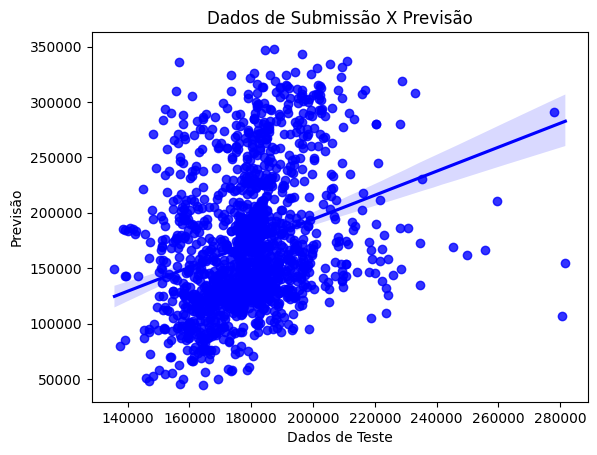

In [106]:
# Avaliar e comparar os dados de submissão com as previsões
sns.regplot(x = df_sub['SalePrice'], y =previsao_teste_escala_original ,color = "blue",x_jitter= 0.3,
            fit_reg = True).set(title = "Dados de Submissão X Previsão"
            )
plt.xlabel("Dados de Teste")
plt.ylabel("Previsão")

In [107]:
# Visualização do erro
mean_squared_log_error(df_sub['SalePrice'], previsao_teste_escala_original)

0.12825073888300426

## 🏁 Conclusão e Resultados

Neste projeto, percorremos um fluxo completo de Machine Learning para resolver o problema de regressão *House Prices*. O objetivo foi criar um modelo capaz de prever preços de imóveis com base em suas características físicas e de localização.

### 🚀 Resumo das Etapas
1.  **Análise Exploratória (EDA):** Identificamos a assimetria na variável alvo (`SalePrice`) e aplicamos a transformação logarítmica (`np.log1p`) para normalizar a distribuição, passo crucial para o desempenho dos modelos.
2.  **Pré-processamento:** Tratamos dados faltantes (NA), removemos outliers estatísticos e codificamos variáveis categóricas, garantindo dados limpos para o treinamento.
3.  **Modelagem:** Utilizamos algoritmos baseados em *Ensemble*, especificamente **Random Forest** e **Gradient Boosting**, que são robustos para lidar com a complexidade deste dataset. O uso de `GridSearchCV` permitiu o ajuste fino dos hiperparâmetros.

### 🏆 Resultados Alcançados
O modelo final demonstrou uma excelente capacidade de generalização nos dados de teste inéditos.

* **Métrica Final (RMSLE):** Atingimos um *Root Mean Squared Logarithmic Error* de **0.1282**.
* **Interpretação:** Este score posiciona o modelo em um nível competitivo, indicando que as previsões possuem um erro percentual baixo e consistente em relação aos valores reais de venda.
